# BMI BMR and Calories Intake prediction

### Model for SheBuilds Hackathon

## Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt #to visualize data
import seaborn as sns #to visualize data

from sklearn.preprocessing import StandardScaler #to scale the data
from sklearn.model_selection import train_test_split #to spilt the data into test and train sets

from sklearn.linear_model import LinearRegression #linear regression library
from sklearn.tree import DecisionTreeRegressor #decision tree library
from sklearn.multioutput import MultiOutputRegressor #multioutput library

from sklearn import ensemble
from sklearn import linear_model
from sklearn import metrics

## Importing the Dataset

In [3]:
data = pd.read_csv('/content/Diet_Plan_Recommendation.csv') #reading the dataset
data.head()

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0


## Dataset Cleaning

In [4]:
data.columns

Index(['Unnamed: 0', 'age', 'weight(kg)', 'height(m)', 'gender', 'BMI', 'BMR',
       'activity_level', 'calories_to_maintain_weight', 'BMI_tags', 'Label'],
      dtype='object')

In [5]:
data = data.drop(['Unnamed: 0', 'Label', 'BMI_tags'], axis=1) #dropping the unwanted or useless columns
data.head()

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
0,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008
1,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511
2,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982
3,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091
4,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351


In [6]:
data.rename(columns = {'weight(kg)':'weight'}, inplace = True)
data.rename(columns = {'height(m)':'height'}, inplace = True)
data.rename(columns = {'calories_to_maintain_weight':'calories'}, inplace = True)

In [7]:
data.head()

,age,weight,height,gender,BMI,BMR,activity_level,calories
0,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008
1,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511
2,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982
3,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091
4,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351


In [8]:
data.isnull().sum() #checking for null values

age               0
weight            0
height            0
gender            0
BMI               0
BMR               0
activity_level    0
calories          0
dtype: int64

In [9]:
# displaying the number of rows and columns
z=data.shape
print("Number of columns: ", z[1])
print("Number of rows: ", z[0])

Number of columns:  8
Number of rows:  10726


In [10]:
data.describe()

,age,weight,height,BMI,BMR,activity_level,calories
count,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,26.778575,61.647728,1.540276,24.788317,1442.049923,1.487451,2118.574075
std,18.201675,24.254566,0.186042,6.954637,250.686166,0.239625,388.425427
min,2.000000,12.005536,0.856328,10.342285,667.941000,1.200000,953.540900
25%,13.000000,45.538375,1.564845,19.557137,1320.322500,1.300000,1815.879700
50%,23.000000,61.323460,1.631282,23.056039,1493.165000,1.500000,2104.599800
75%,36.000000,83.484585,1.632234,31.334294,1602.488000,1.700000,2405.301750
max,90.000000,98.799820,1.633223,37.142927,1914.374000,1.900000,2949.075500


## Machine Learning Model

In [11]:
data.head()

,age,weight,height,gender,BMI,BMR,activity_level,calories
0,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008
1,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511
2,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982
3,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091
4,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351


In [13]:
x = data.assign(gender = lambda d: d['gender']== 'M')[['gender', 'age', 'height', 'weight', 'activity_level']] #independent variables
y = data[['BMI', 'BMR', 'calories']].values #dependent variables

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y.astype('float32')) #splitting the dataset into training and testing data

base_reg = linear_model.Ridge()
clf = MultiOutputRegressor(LinearRegression())
clf.fit(x_train, y_train) #fitting the values into the model

y_pred = clf.predict(x_test) #predicting the values for the test set

In [15]:
#calculating the accuracy of the model on the training and testing data
print('RSquared value on train: {:.4f}'.format(clf.score(x_train, y_train)))
print('RSquared value on test: {:.4f}'.format(clf.score(x_test, y_test)))

RSquared value on train: 0.9589
RSquared value on test: 0.9564


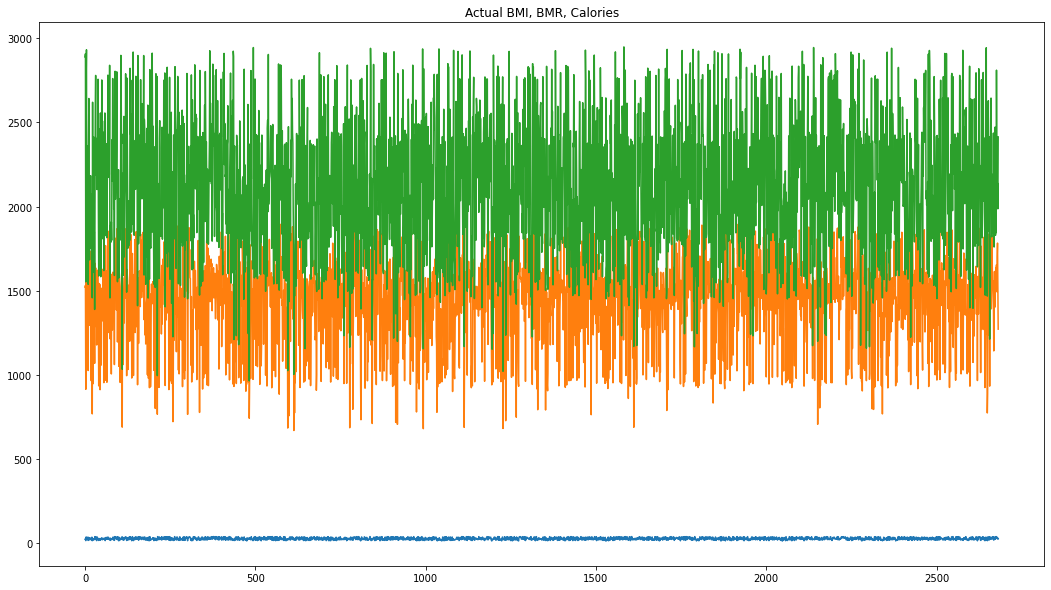

In [19]:
#visual representation of the original data
plt.figure(figsize=(18,10))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test)
plt.title("Actual BMI, BMR, Calories")
plt.show()

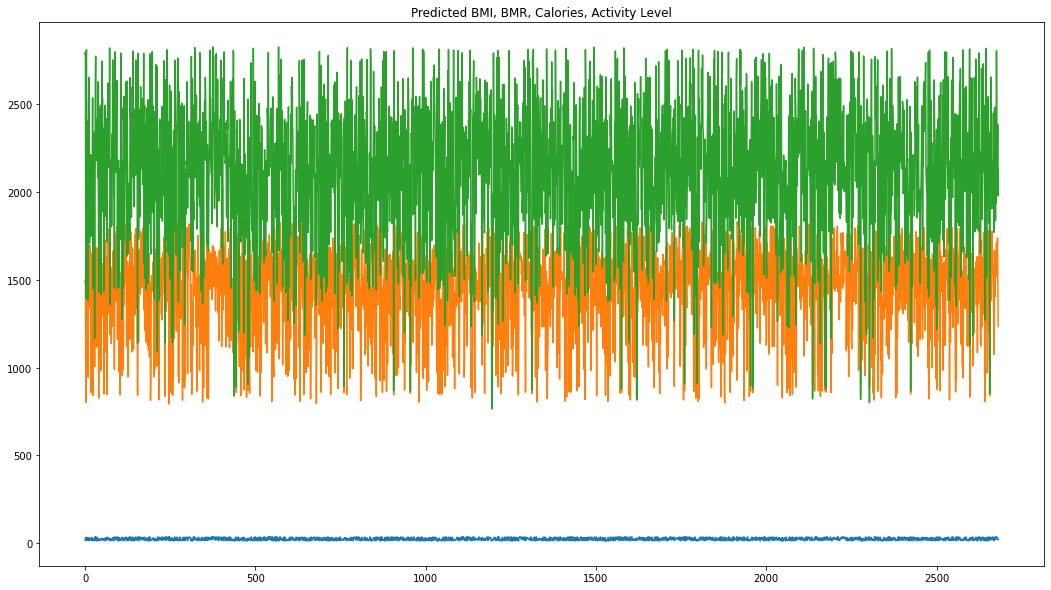

In [20]:
#visual representation of the predicted data
plt.figure(figsize=(18,10))
x_ax = range(len(y_test))
plt.plot(x_ax, y_pred)
plt.title("Predicted BMI, BMR, Calories, Activity Level")
plt.show()

## Packaging the model

In [22]:
#using pickle to ship the model. The pickle file will be further used by the web team for deployment
import pickle
filename = 'final_model.pkl'
pickle.dump(clf, open(filename, 'wb'))